# DocuSketch

## These are deviations of floor vs ceiling corners of one of our models with ground truth labels for the room name and number of corners in that room with predictions. Please create meaningful statistics of how well the model performed.

### Install dependencies and import libraries

In [ ]:
!pip install -r requirements.txt

In [1]:
import seaborn as sns
import numpy as np
import os

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib import *
%matplotlib inline

import urllib, json, requests
import pandas as pd
from pylab import *

f = figure ( figsize =(7,7) )

<Figure size 504x504 with 0 Axes>

### import graph class with functions from drowing_plots.py

In [2]:
from drowing_plots import all_plots

### read json file passed as parameter as a pandas dataframe

In [3]:
url = 'https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json'

response = urllib.request.urlopen(url)
data_dict = json.loads(response.read())
data = pd.DataFrame.from_dict(data_dict)

At first, we have to see common information for our data and true, predicted labels

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1346
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1347 non-null   object 
 1   gt_corners    1347 non-null   float64
 2   rb_corners    1347 non-null   float64
 3   mean          1347 non-null   float64
 4   max           1347 non-null   float64
 5   min           1347 non-null   float64
 6   floor_mean    1347 non-null   float64
 7   floor_max     1347 non-null   float64
 8   floor_min     1347 non-null   float64
 9   ceiling_mean  1347 non-null   float64
 10  ceiling_max   1347 non-null   float64
 11  ceiling_min   1347 non-null   float64
dtypes: float64(11), object(1)
memory usage: 136.8+ KB


In [5]:
data.name.value_counts()

Master Bedroom              42
Dining room                 36
Bathroom                    36
Hallway                     31
Bedroom 2                   31
                            ..
Second floor 3               1
Dinning room                 1
Bonus room                   1
Second Floor #4 Bathroom     1
Up bathroom                  1
Name: name, Length: 588, dtype: int64

The data has more than 588 different names of rooms in 1347 items, however homes of flats have only 10-20 maximum. 
There are a lot of duble names in another languages or principle.
If it showed accuracy for our model, we would taken items names to common positions.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gt_corners,1347.0,4.307350,0.814412,4.000000,4.000000,4.000000,4.000000,10.000000
rb_corners,1347.0,4.307350,0.814412,4.000000,4.000000,4.000000,4.000000,10.000000
mean,1347.0,12.895320,21.839948,0.192973,0.658488,2.123456,14.810982,121.301055
max,1347.0,25.448011,42.758159,0.323886,1.243804,4.703514,28.312051,179.165483
min,1347.0,2.920388,9.258972,0.007456,0.147432,0.279876,0.674444,81.764483
floor_mean,1347.0,11.022443,19.136320,0.134686,0.514150,1.932503,13.430288,121.244083
floor_max,1347.0,20.405499,33.189081,0.178059,0.888043,4.008014,24.986504,177.961811
floor_min,1347.0,3.146246,9.559611,0.007456,0.164668,0.304374,0.801416,81.791505
ceiling_mean,1347.0,14.768198,26.047057,0.123169,0.742915,2.159995,15.150233,157.387474
ceiling_max,1347.0,24.848020,42.345579,0.220846,1.180960,3.777277,27.551533,179.165483


### Let's look at the graphs from draw class

In [7]:
graph = all_plots(data)

The model predicted values in gt_corners. Let's look at their types
    Also we can see, we have only 4 corner types, and rooms: 4, 6, 8 and 10. Besides, common type is 4-corners rooms.    Room with 10 corners only one, so we can use separatly description for it without graphs:
type of corner room and count items for this: 
4.0     1163
6.0      162
8.0       21
10.0       1
Name: gt_corners, dtype: int64


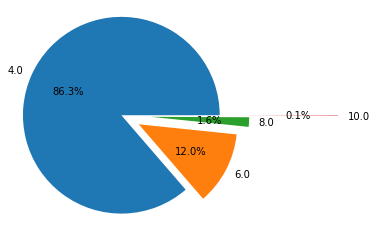

In [8]:
graph.draw_target_types('gt_corners')

Find out differencies from y_true(gt_corners) and y_pred(rb_corners) in the results of our model: 
1.0 - 100 % y_true and y_pred is the same, and the is no errors, less 1.0 - % of errors1.0


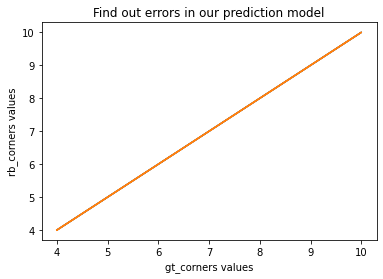

In [10]:
print(f'Find out differencies from y_true(gt_corners) and y_pred(rb_corners) in the results of our model: \n\
1.0 - 100 % y_true and y_pred is the same, and the is no errors, less 1.0 - % of errors\
{r2_score(data.gt_corners, data.rb_corners)}')
graph.draw_plots()

In [11]:
data[data['gt_corners']==10]

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
739,Master Bathroom,10.0,10.0,13.202775,53.145464,0.195567,13.67592,53.145464,0.262791,12.72963,49.7854,0.195567


In [12]:
print('Judging by the description, the room with 10 corners has very unusual incline, \
      because floo derivative from 13 to 53 degree, ceiling derivation could be more then 49')

Judging by the description, the room with 10 corners has very unusual incline,       because floo derivative from 13 to 53 degree, ceiling derivation could be more then 49


So, graphs show to us that the values don t have normal distribution.     Also, we have many noise, because a lot of items unusual design - from 25 to more than 200 degree of deviations    Most min values, including floor and ceiling, have approximately deviations from 0 to 10 degree.    Majority of mean values - from 0 to 20    And common of max values - from 0 to 50.    If we try to exclude noises, we ll find out more exactly values.


/Users/natalaurina/.pyenv/versions/3.7.8/envs/jupyter_notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/natalaurina/.pyenv/versions/3.7.8/envs/jupyter_notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/natalaurina/.pyenv/versions/3.7.8/envs/jupyter_notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed i

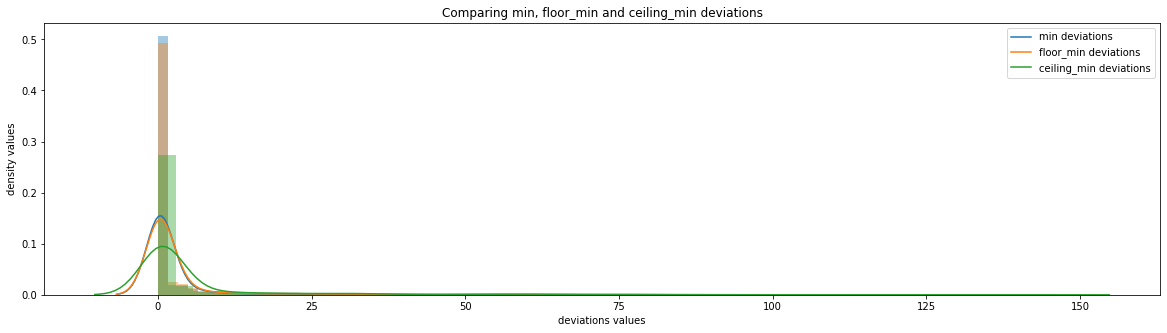

/Users/natalaurina/.pyenv/versions/3.7.8/envs/jupyter_notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/natalaurina/.pyenv/versions/3.7.8/envs/jupyter_notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/natalaurina/.pyenv/versions/3.7.8/envs/jupyter_notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed i

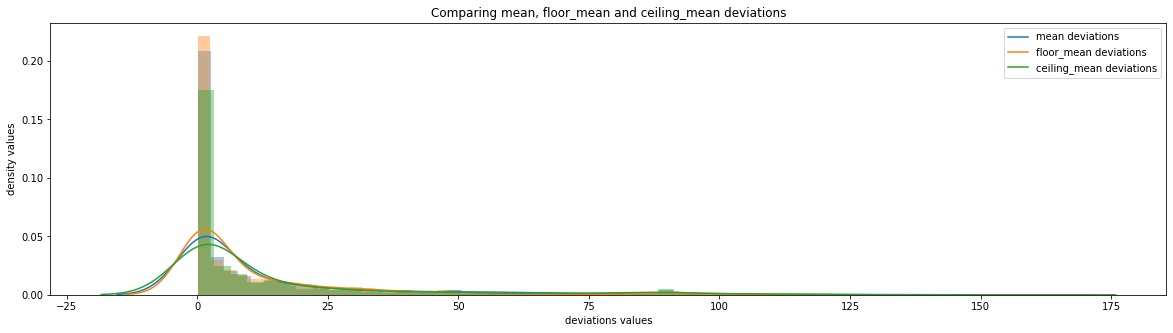

/Users/natalaurina/.pyenv/versions/3.7.8/envs/jupyter_notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/natalaurina/.pyenv/versions/3.7.8/envs/jupyter_notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/natalaurina/.pyenv/versions/3.7.8/envs/jupyter_notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed i

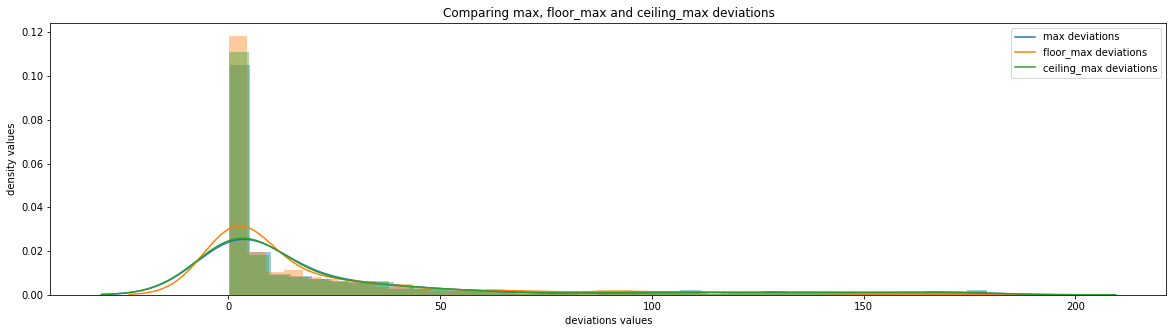

In [13]:
graph.draw_distributions()

Let s try boxes: that graphs have clearlier explanation.    You can find out description how they works follow this link:    https://matplotlib.org/stable/_images/boxplot_explanation.png.     Common mean and floor_mean deviations have +/- equall values of degree,           instead of ceiling_mean devitions.           We have similar picture of the min and max values.          But there is a lot of noise in the data. 


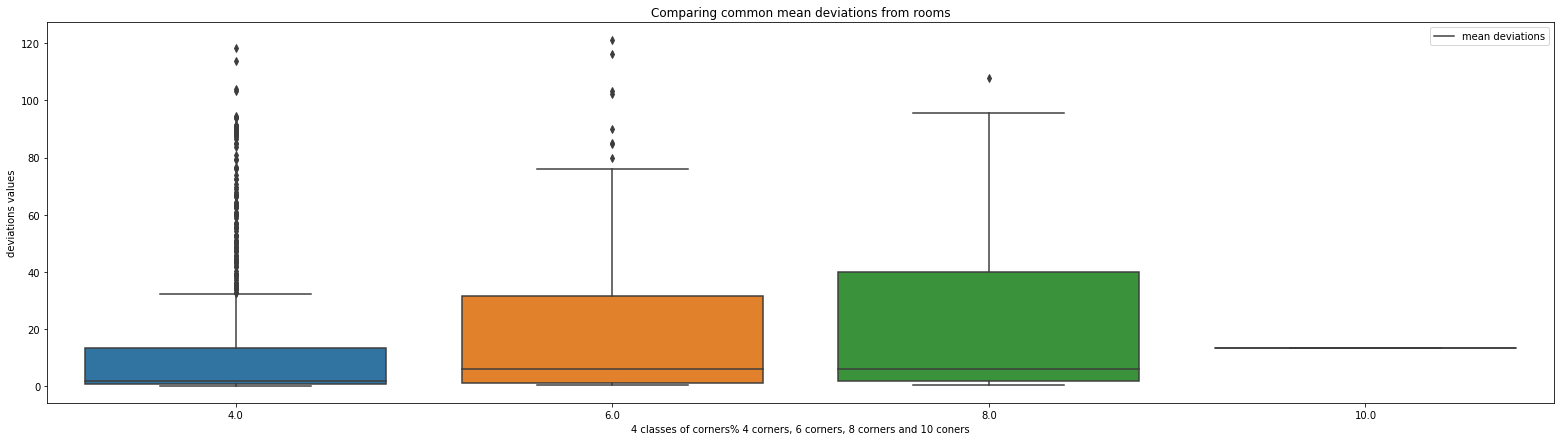

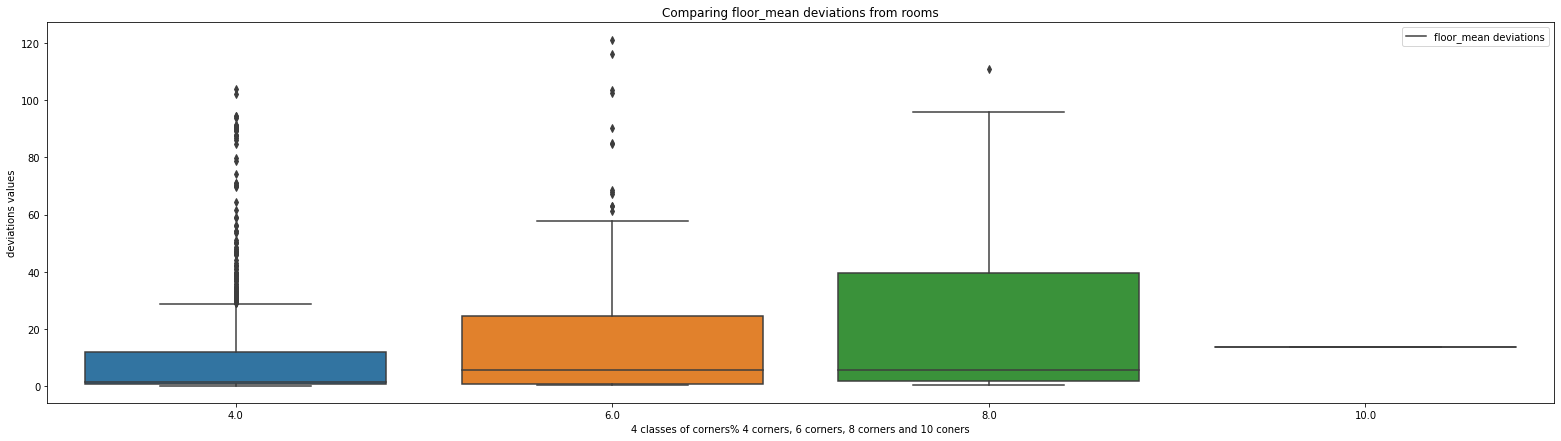

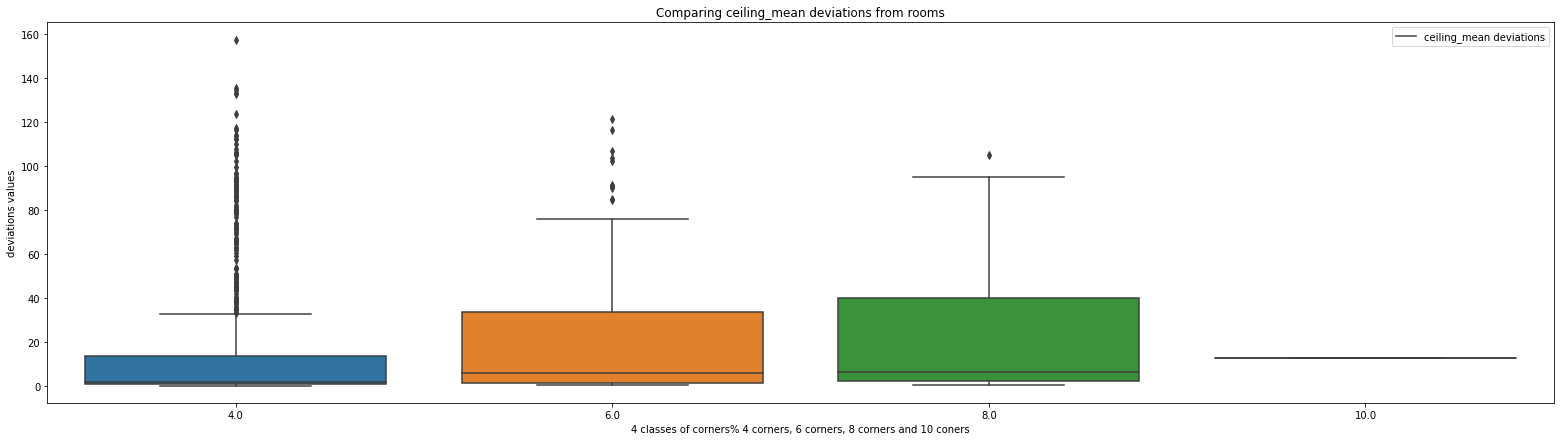

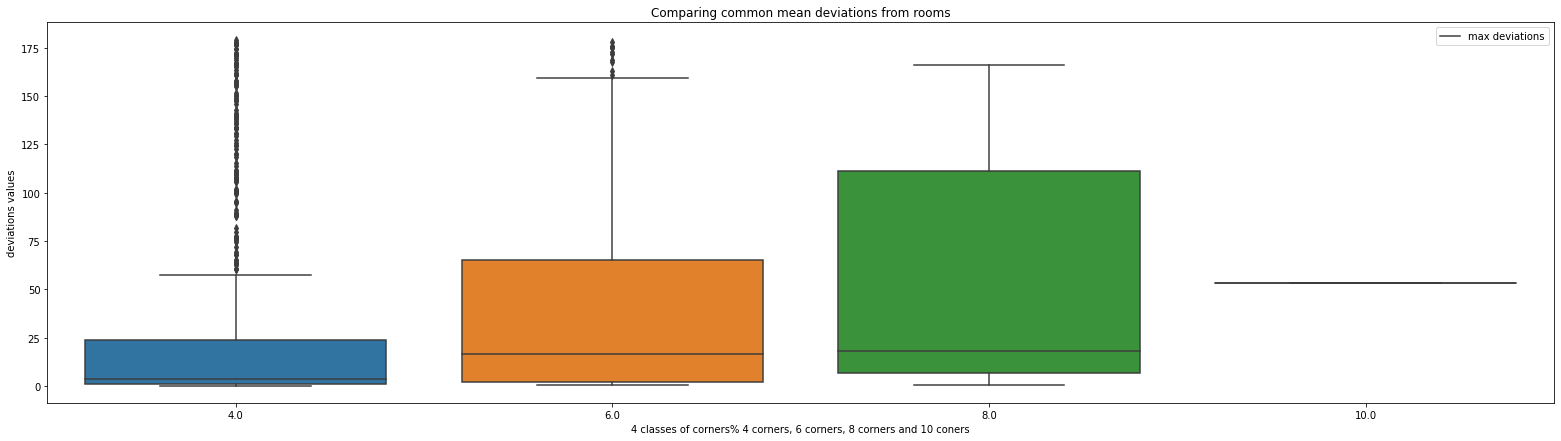

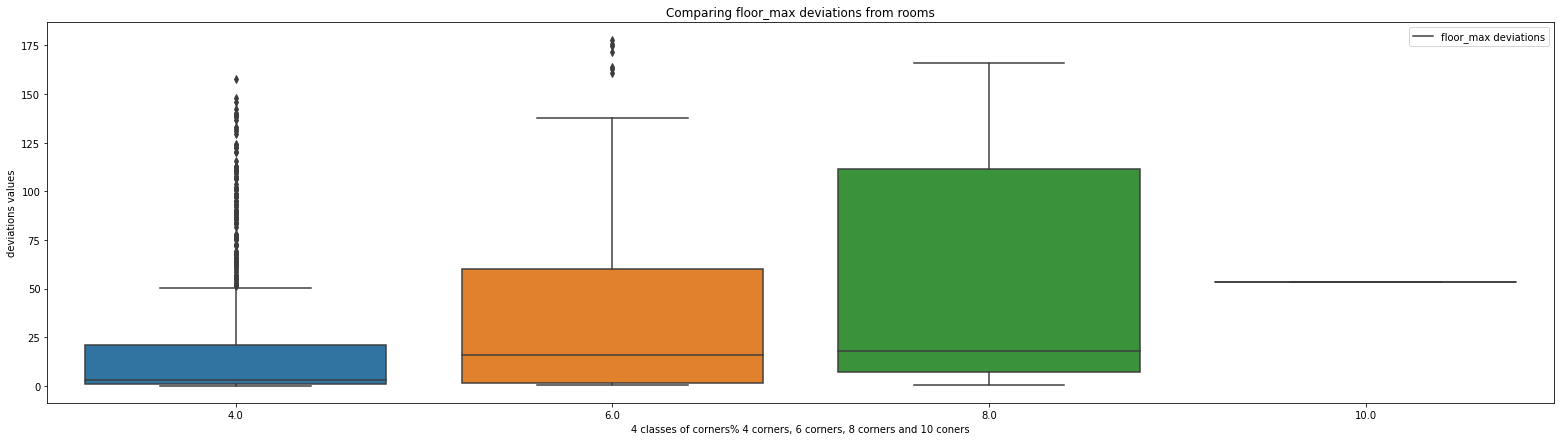

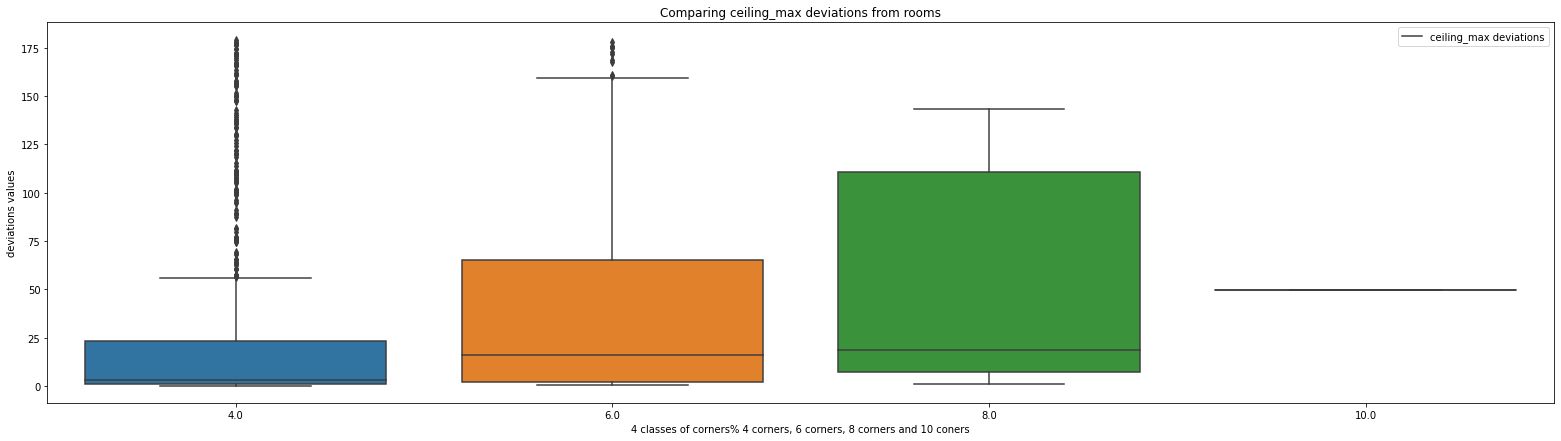

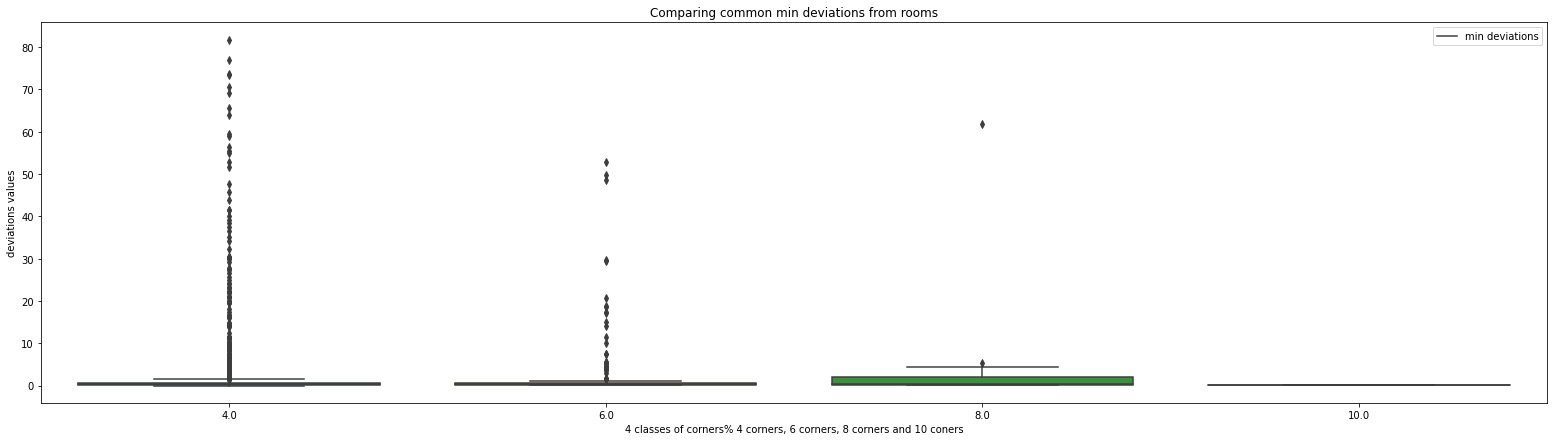

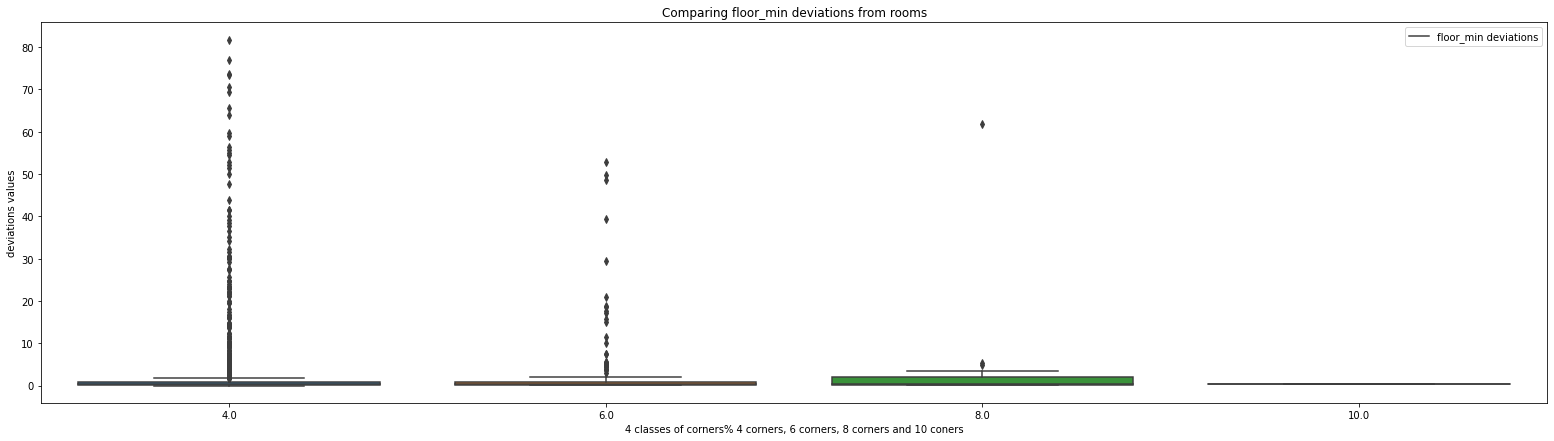

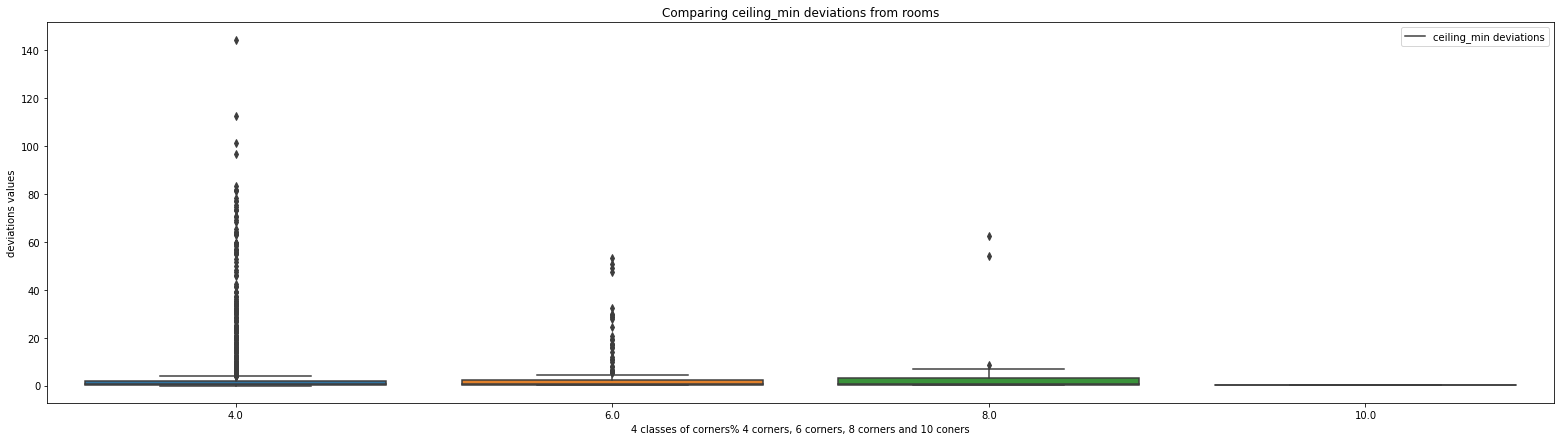

We removed noise and left the most common values.
At first, we show common derivation: min, mean and max


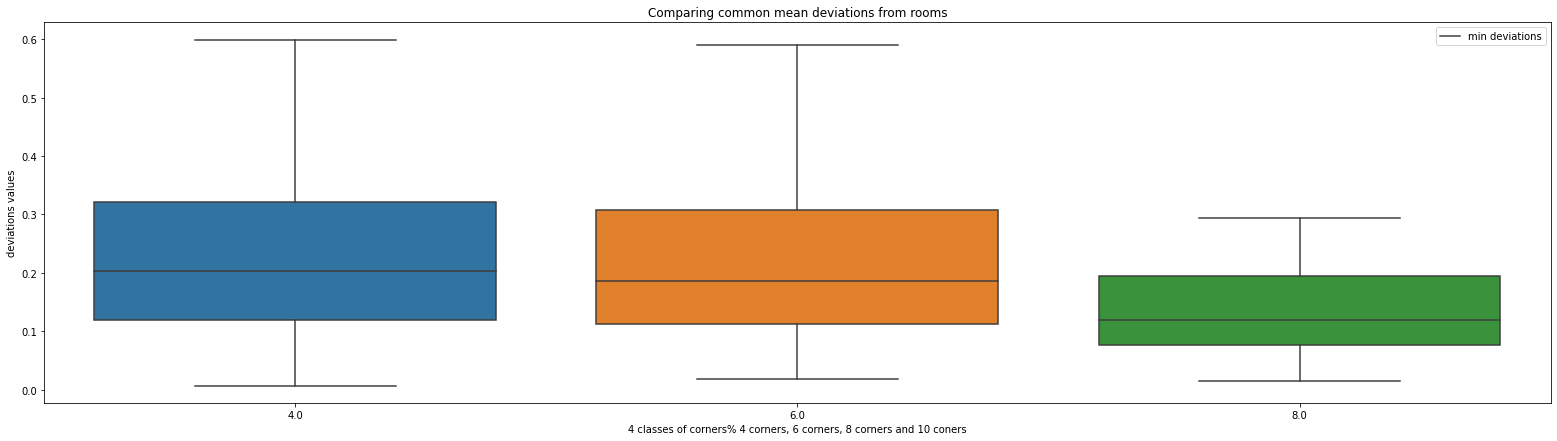

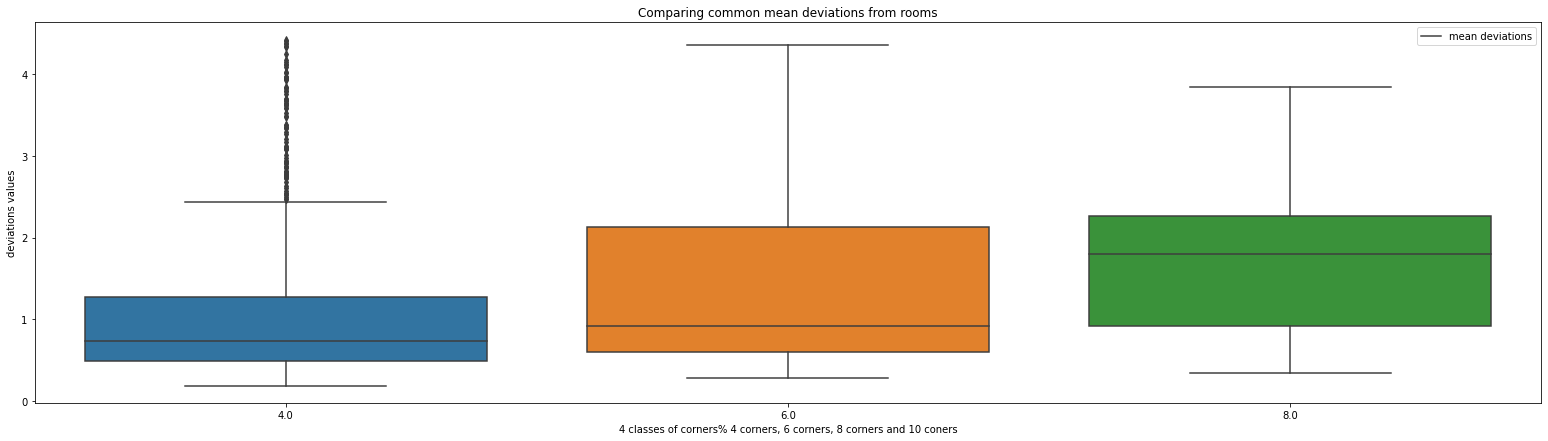

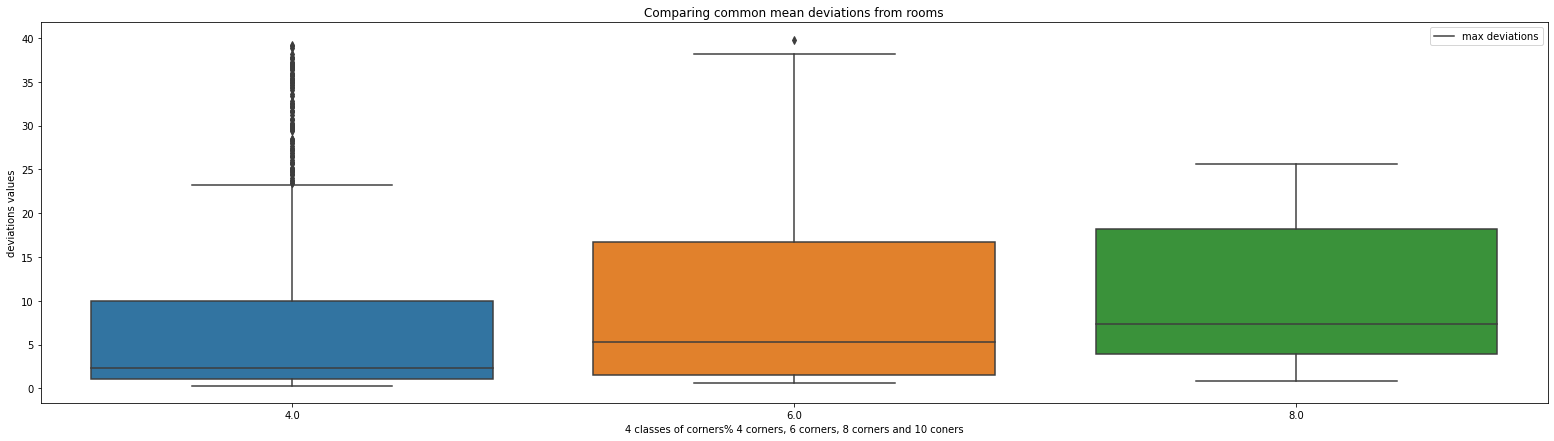

/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:254: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  common_min = data[data['gt_corners']==corner][data['min']<0.6]['min']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:255: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  common_mean = data[data['gt_corners']==corner][data['mean']<4.5]['mean']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:256: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  common_max = data[data['gt_corners']==corner][data['max']<40]['max']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:254: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  common_min = data[data['gt_corners']==corner][data['min']<0.6]['min']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:255: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


common deviations: for 4-corners:
        from 0.01        to 0.6,        with majority of them is approximately 0.23 degree for MIN;
        from 0.19        to 4.42,        with majority of them is approximately 1.12 degree for MEAN;
        from 0.32        to 39.2,        with majority of them is approximately 7.39 degree for MAX;
common deviations: for 6-corners:
        from 0.02        to 0.59,        with majority of them is approximately 0.22 degree for MIN;
        from 0.28        to 4.35,        with majority of them is approximately 1.42 degree for MEAN;
        from 0.57        to 39.81,        with majority of them is approximately 10.36 degree for MAX;
common deviations: for 8-corners:
        from 0.01        to 0.29,        with majority of them is approximately 0.14 degree for MIN;
        from 0.34        to 3.83,        with majority of them is approximately 1.78 degree for MEAN;
        from 0.83        to 25.58,        with majority of them is approximately 10.21

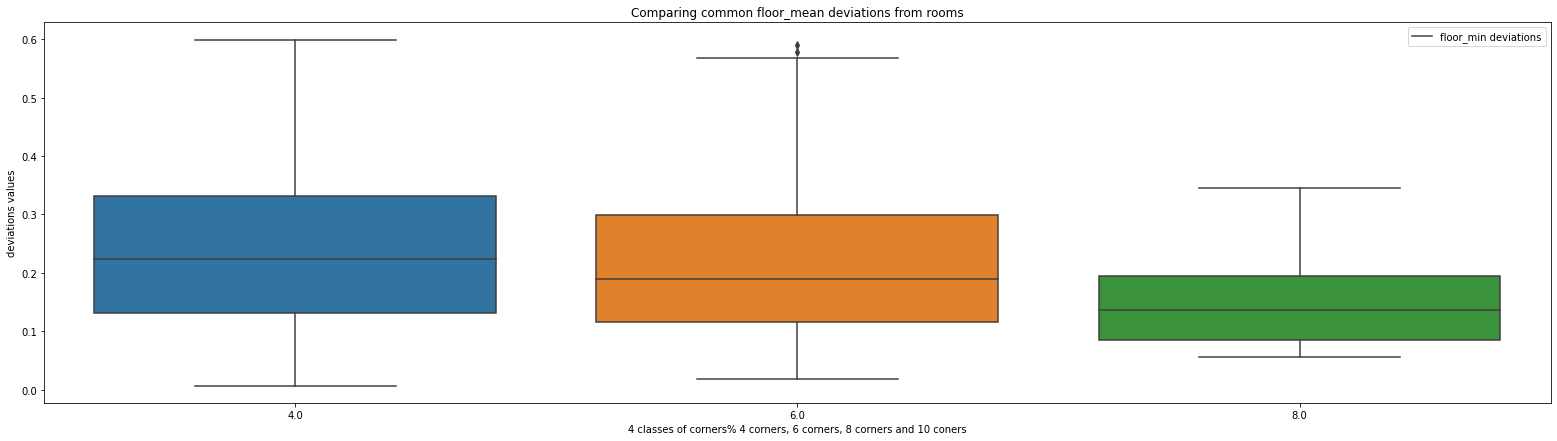

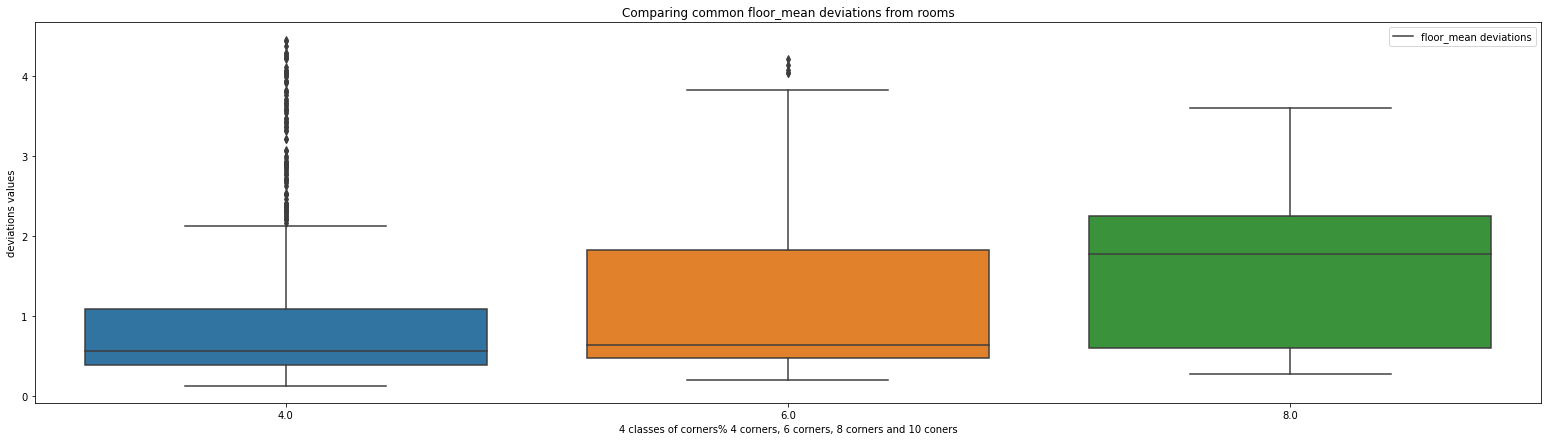

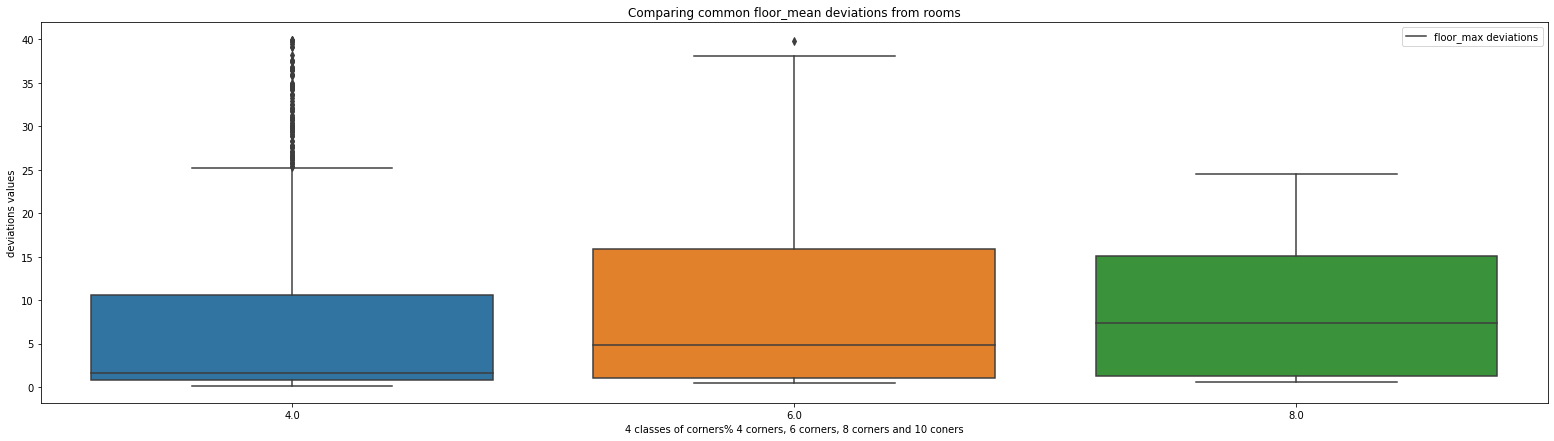

/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:309: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  floor_min = data[data['gt_corners'] == corner][data['floor_min'] < 0.6]['floor_min']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:310: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  floor_mean = data[data['gt_corners'] == corner][data['floor_mean'] < 4.5]['floor_mean']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:311: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  floor_max = data[data['gt_corners'] == corner][data['floor_max'] < 40]['floor_max']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:309: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  floor_min = data[data['gt_corners'] == corner][data['floor_min'] < 0.6]['floor_min']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:310: UserWarning: Boo

floor deviations: for 4-corners:
        from 0.01        to 0.6,        with majority of them is approximately 0.24 degree for floor_MIN;
        from 0.13        to 4.45,        with majority of them is approximately 1.0 degree for floor_MEAN;
        from 0.18        to 39.96,        with majority of them is approximately 7.33 degree for floor_MAX;
floor deviations: for 6-corners:
        from 0.02        to 0.59,        with majority of them is approximately 0.22 degree for floor_MIN;
        from 0.2        to 4.21,        with majority of them is approximately 1.24 degree for floor_MEAN;
        from 0.42        to 39.81,        with majority of them is approximately 9.68 degree for floor_MAX;
floor deviations: for 8-corners:
        from 0.06        to 0.35,        with majority of them is approximately 0.16 degree for floor_MIN;
        from 0.28        to 3.6,        with majority of them is approximately 1.59 degree for floor_MEAN;
        from 0.63        to 24.55,        wi

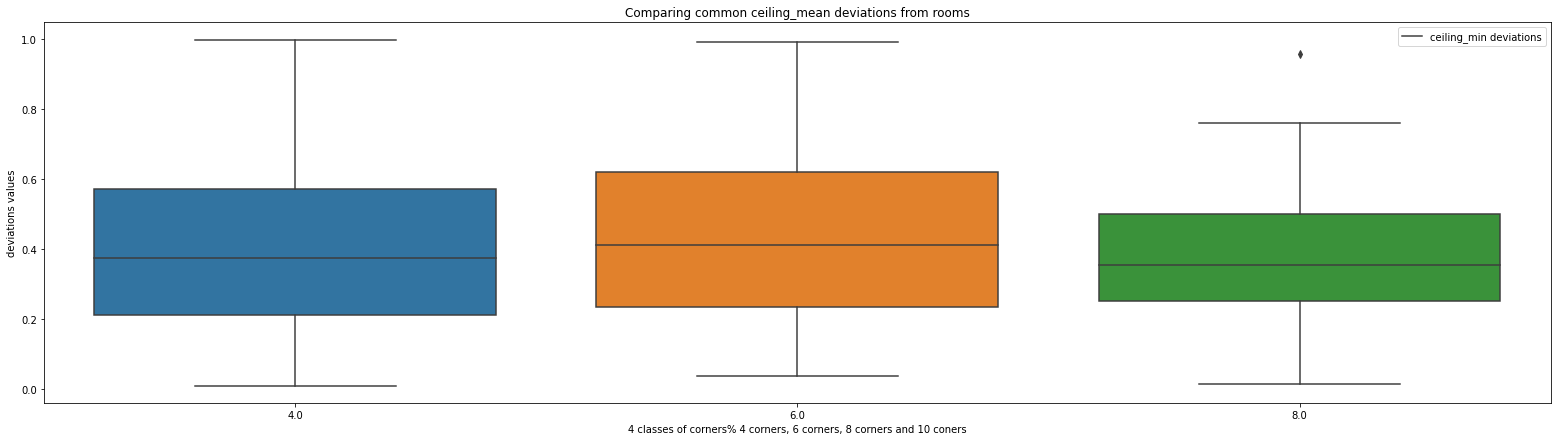

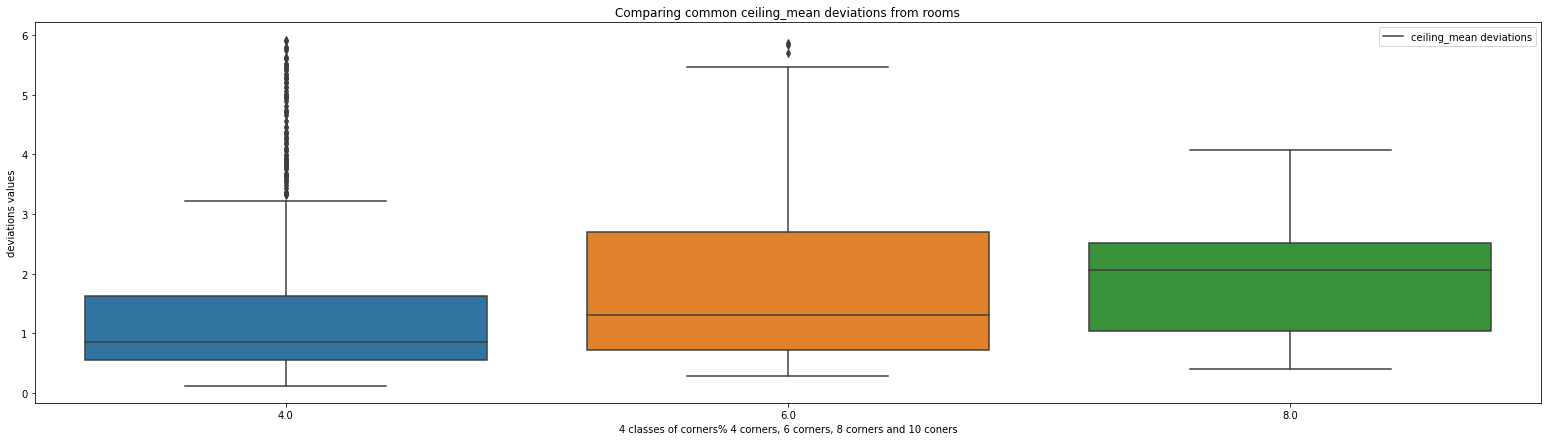

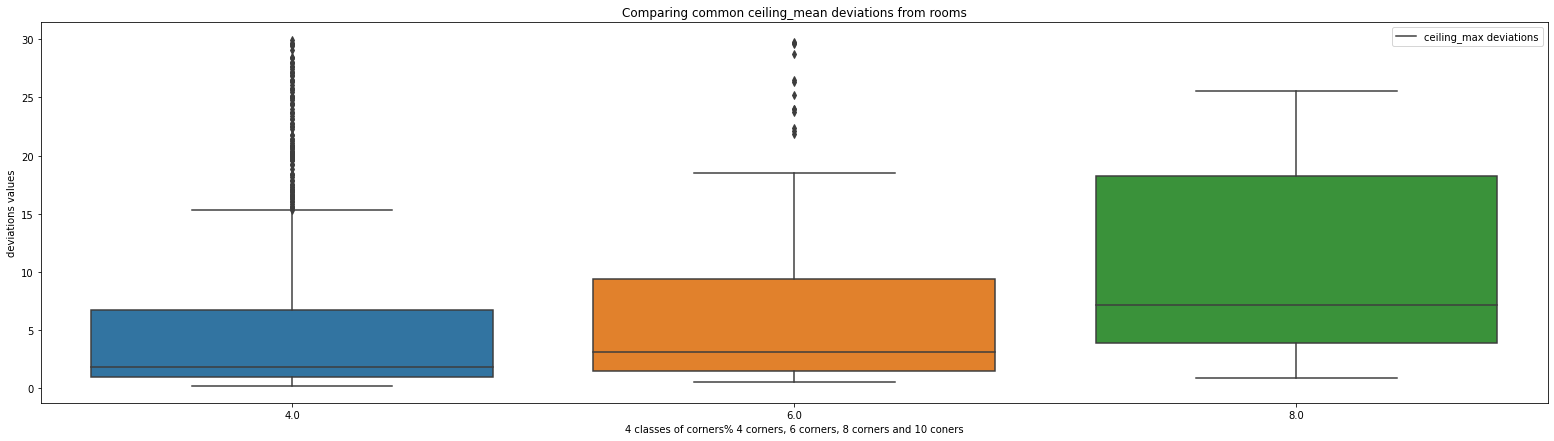

ceiling deviations: for 4-corners:
        from 0.01        to 1.0,        with majority of them is approximately 0.41 degree for ceiling_MIN;
        from 0.12        to 5.93,        with majority of them is approximately 1.37 degree for ceiling_MEAN;
        from 0.22        to 29.98,        with majority of them is approximately 5.38 degree for ceiling_MAX
ceiling deviations: for 6-corners:
        from 0.04        to 0.99,        with majority of them is approximately 0.43 degree for ceiling_MIN;
        from 0.28        to 5.87,        with majority of them is approximately 1.92 degree for ceiling_MEAN;
        from 0.53        to 29.77,        with majority of them is approximately 7.33 degree for ceiling_MAX
ceiling deviations: for 8-corners:
        from 0.01        to 0.96,        with majority of them is approximately 0.41 degree for ceiling_MIN;
        from 0.41        to 4.07,        with majority of them is approximately 1.98 degree for ceiling_MEAN;
        from 0.83    

/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:366: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ceiling_min = data[data['gt_corners'] == corner][data['ceiling_min'] < 1]['ceiling_min']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:367: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ceiling_mean = data[data['gt_corners'] == corner][data['ceiling_mean'] < 6]['ceiling_mean']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:368: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ceiling_max = data[data['gt_corners'] == corner][data['ceiling_max'] < 30]['ceiling_max']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:366: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ceiling_min = data[data['gt_corners'] == corner][data['ceiling_min'] < 1]['ceiling_min']
/Users/natalaurina/PycharmProjects/DocuScketch/graphs_def.py:367

In [14]:
graph.draw_boxes()

In [ ]:
# saved requirements.txt
!pip freeze > requirements.txt